In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

plt.style.use(style='ggplot')
%matplotlib inline

In [161]:
data = pd.read_csv('train_data.csv')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5,NaN,2
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5,NaN,12
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5,8.61 Lakh,4
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7,NaN,6
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5,NaN,18


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3499 non-null   object 
 1   Location           3499 non-null   object 
 2   Year               3499 non-null   int64  
 3   Kilometers_Driven  3499 non-null   int64  
 4   Fuel_Type          3499 non-null   object 
 5   Transmission       3499 non-null   object 
 6   Owner_Type         3499 non-null   object 
 7   Mileage            3499 non-null   object 
 8   Engine             3477 non-null   object 
 9   Power              3477 non-null   object 
 10  Seats              3474 non-null   float64
 11  New_Price          481 non-null    object 
 12  Price              3499 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 355.5+ KB


In [163]:
# Check Missing Values
round(data.isnull().mean() * 100, 2)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               1
Power                1
Seats                1
New_Price           86
Price                0
dtype: float64

In [164]:
data.dropna(subset = ['Mileage', 'Power', 'Mileage', 'Seats'], inplace=True)
data.drop(['New_Price'],axis=1, inplace=True)

In [165]:
kmkg = 0
kmpl = 0
for i in data.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Km/Kg : {} '.format(kmpl))

The number of rows with Km/Kg : 42 
The number of rows with Km/Kg : 3432 


In [166]:
Correct_Mileage= []
for i in data.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))

In [167]:
data['Mileage']=Correct_Mileage

In [168]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37,998 CC,58.16 bhp,5,2
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,20,1582 CC,126.2 bhp,5,12
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18,1199 CC,88.7 bhp,5,4
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,21,1248 CC,88.76 bhp,7,6
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968 CC,140.8 bhp,5,18


In [169]:
# Check 'null bhp' Values
data[data['Power'] == 'null bhp']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17,1399 CC,null bhp,5,2
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0,1086 CC,null bhp,5,1
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17,1086 CC,null bhp,5,2
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17,1086 CC,null bhp,5,1
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17,1086 CC,null bhp,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3104,Maruti Swift VDI BSIV,Kolkata,2013,41300,Diesel,Manual,First,17,1248 CC,null bhp,5,3
3189,Hyundai Santro GS zipDrive - Euro II,Chennai,2002,67000,Petrol,Manual,Third,0,999 CC,null bhp,5,1
3247,Toyota Etios GD,Chennai,2011,79000,Diesel,Manual,First,24,1364 CC,null bhp,5,5
3290,Ford Fiesta 1.4 SXi TDCi,Hyderabad,2008,83000,Diesel,Manual,Second,17,1399 CC,null bhp,5,2


In [170]:
# Replace 'null bhp' with the mean of Power
data['Power'] = data['Power'].str.replace('null bhp', '113')   # 113 is a median of Power feature

In [171]:
data['Engine'] = data['Engine'].str.replace('[^\d\.]', '').astype('float64')
data['Power'] = data['Power'].str.replace('[^\d\.]', '').astype('float64')

In [172]:
# Check Duplicate Values
data.duplicated().sum()

0

0 Kilometers_Driven
1 Mileage
2 Power
3 Engine


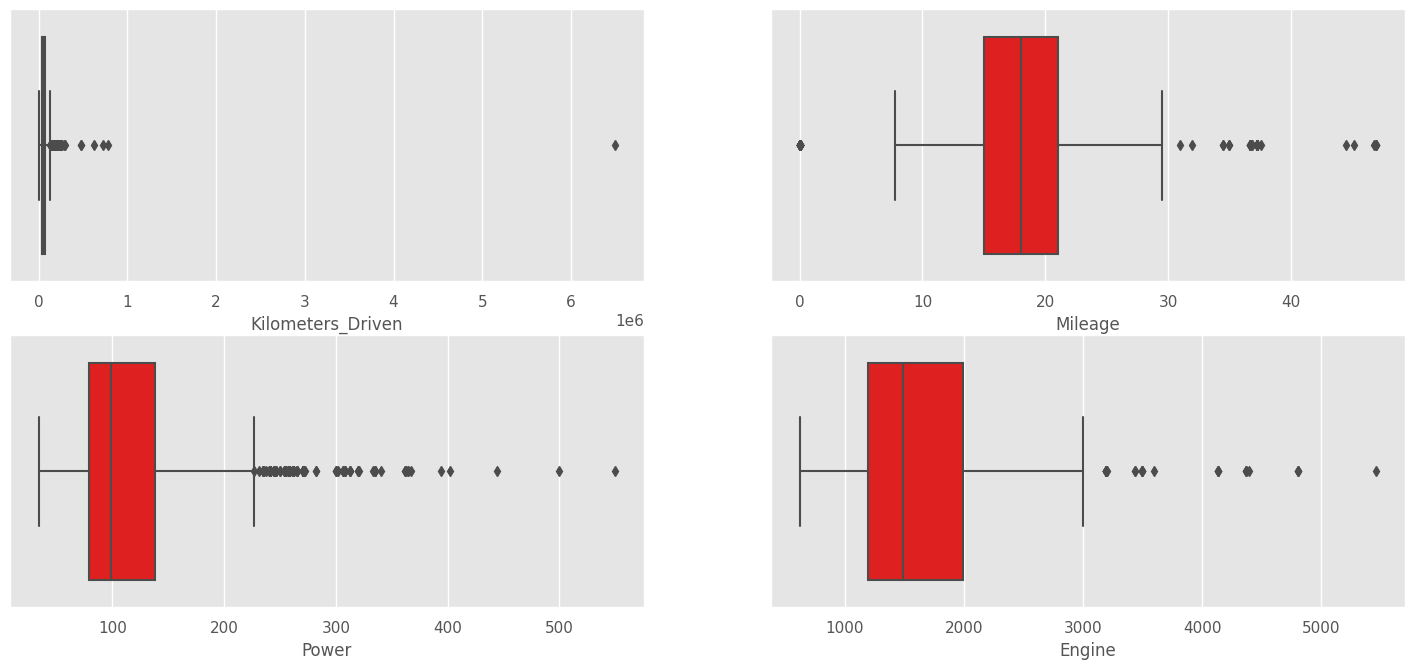

In [173]:
col = ['Kilometers_Driven', 'Mileage', 'Power', 'Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(data = data, x = v, color = 'red')
plt.show()

In [174]:
# Remove outliers for Kilometers_Driven
data.drop(data[data['Kilometers_Driven'] > 100000].index, axis = 0, inplace = True)

# Remove outliers for Power
data.drop(data[data['Power'] > 480].index, axis = 0, inplace = True)

# Remove outliers for Engine
data.drop(data[data['Engine'] > 5000].index, axis = 0, inplace = True)

0 Kilometers_Driven
1 Mileage
2 Power
3 Engine


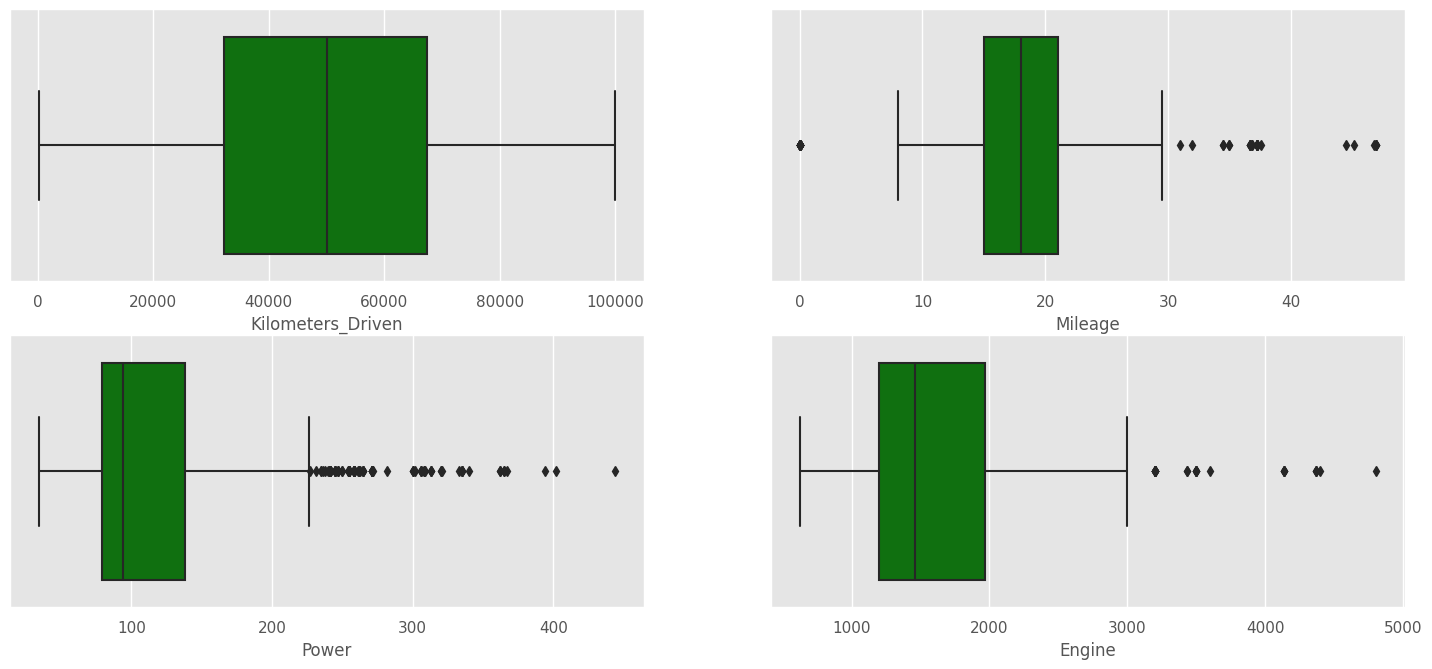

In [175]:
col = ['Kilometers_Driven', 'Mileage', 'Power', 'Engine'] 
plt.figure(figsize=(18,12))
for i,v in enumerate(col):
    print(i,v)
    plt.subplot(3,2,i+1)
    sns.boxplot(data = data, x = v, color = 'green')
plt.show()

In [176]:
# change float format
pd.options.display.float_format = '{:,.0f}'.format

In [177]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,"3,184","3,184","3,184","3,184","3,184","3,184","3,184"
mean,"2,014","50,089",18,"1,598",113,5,10
std,3,"23,397",5,573,52,1,12
min,"1,998",171,0,624,34,2,0
25%,"2,012","32,197",15,"1,197",79,5,4
50%,"2,014","50,105",18,"1,461",94,5,6
75%,"2,016","67,409",21,"1,968",138,5,10
max,"2,019","100,000",47,"4,806",444,10,97


In [178]:
# Check Name column uniques 
data['Name'].nunique()

1352

In [179]:
print(f"Percentage of uniques { round(data['Name'].nunique() / data.shape[0] * 100)} %")

Percentage of uniques 42 %


In [180]:
data['Name']

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
3494                Hyundai Verna 1.6 SX
3495            Maruti Wagon R LXI BS IV
3496         Maruti Ertiga SHVS ZDI Plus
3497     Hyundai Xcent 1.1 CRDi S Option
3498                    Maruti Swift VDI
Name: Name, Length: 3184, dtype: object

We can notice that the first word of the name is (Brand), so let's get it



In [181]:
data['Brand'] = data['Name'].apply(lambda row: row.split()[0])

In [182]:
data['Brand'].nunique()

26

In [183]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Renault', 'Mercedes-Benz', 'BMW',
       'Mahindra', 'Ford', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet',
       'Skoda', 'Mini', 'Mitsubishi', 'Fiat', 'Jeep', 'Porsche',
       'Ambassador', 'Isuzu'], dtype=object)

Now we don't need the 'Name ' column, So let's drop it.

In [184]:
# Drop Name column
data.drop(['Name'], axis=1, inplace=True)

In [185]:
# change the position of columns
data = data.reindex(columns=['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 
                             'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'])

EDA

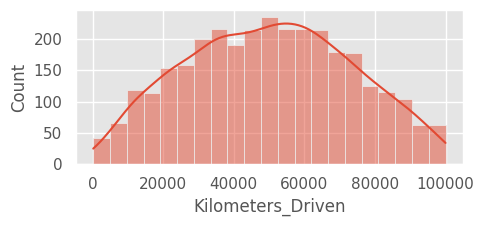

In [186]:
plt.figure(figsize = (5,2))
sns.histplot(data = data, x = data['Kilometers_Driven'], kde = True)
plt.show()

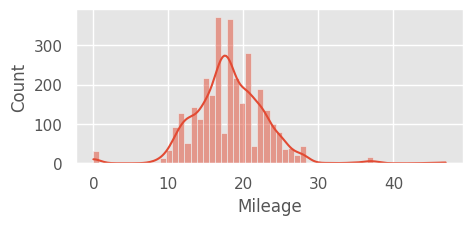

In [187]:
plt.figure(figsize = (5,2))
sns.histplot(data = data, x = data['Mileage'], kde = True)
plt.show()

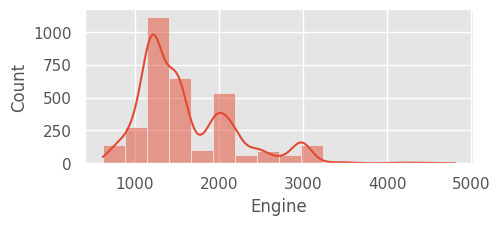

In [188]:
plt.figure(figsize = (5,2))
sns.histplot(data = data, x = data['Engine'], bins = 16, kde = True)
plt.show()

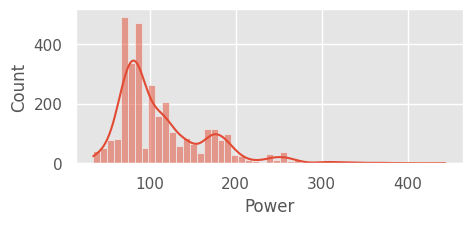

In [189]:
plt.figure(figsize = (5,2))
sns.histplot(data = data, x = data['Power'], kde = True)
plt.show()

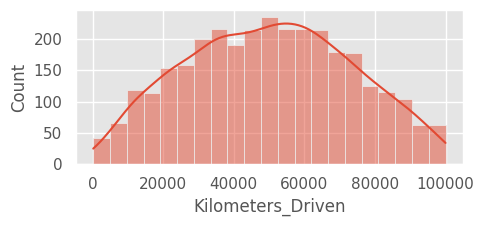

In [190]:
plt.figure(figsize = (5, 2))
sns.histplot(data = data, x = data['Kilometers_Driven'], kde = True)
plt.show()

In [191]:
data['Location'].value_counts().sort_values(ascending = False)

Mumbai        454
Kochi         369
Coimbatore    368
Hyderabad     346
Kolkata       314
Delhi         300
Pune          283
Chennai       216
Jaipur        210
Bangalore     200
Ahmedabad     124
Name: Location, dtype: int64

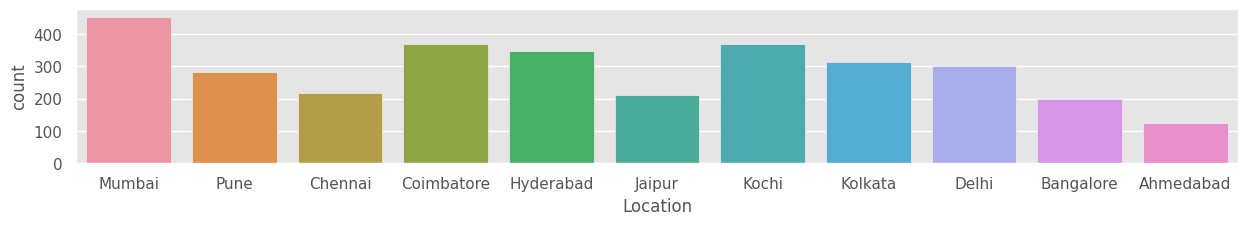

In [192]:
plt.figure(figsize = (15,2))
sns.countplot(data = data, x = 'Location')
plt.show()

In [193]:
data['Owner_Type'].value_counts().sort_values(ascending = False)

First             2660
Second             465
Third               55
Fourth & Above       4
Name: Owner_Type, dtype: int64

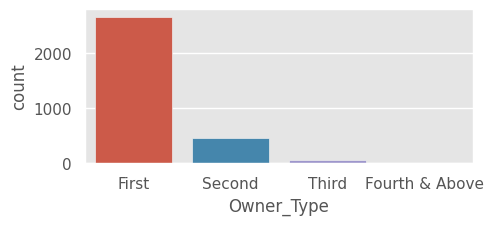

In [194]:
plt.figure(figsize = (5,2))
sns.countplot(data = data, x = 'Owner_Type')
plt.show()

In [195]:
data['Fuel_Type'].value_counts().sort_values(ascending = False)

Diesel    1656
Petrol    1486
CNG         35
LPG          7
Name: Fuel_Type, dtype: int64

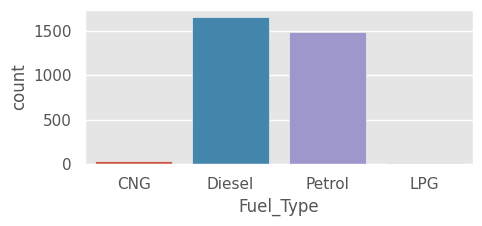

In [196]:
plt.figure(figsize = (5,2))
sns.countplot(data = data, x = 'Fuel_Type')
plt.show()

In [197]:
data['Transmission'].value_counts().sort_values(ascending = False)

Manual       2236
Automatic     948
Name: Transmission, dtype: int64

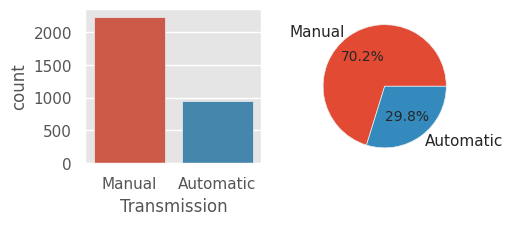

In [198]:
fig, ax = plt.subplots(1, 2, figsize = (5,2))
sns.countplot(data = data, x = 'Transmission', ax = ax[0])
ax[1].pie(data['Transmission'].value_counts().values, labels = data['Transmission'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

In [199]:
Brand_data = data['Brand'].value_counts().sort_values(ascending = False)
Brand_data

Maruti           670
Hyundai          603
Honda            320
Mercedes-Benz    177
Toyota           172
Volkswagen       162
Ford             152
BMW              144
Mahindra         141
Audi             138
Skoda             89
Tata              87
Renault           76
Chevrolet         69
Nissan            47
Land              28
Jaguar            26
Mini              22
Volvo             12
Fiat              11
Jeep              11
Mitsubishi        10
Porsche           10
Datsun             5
Ambassador         1
Isuzu              1
Name: Brand, dtype: int64

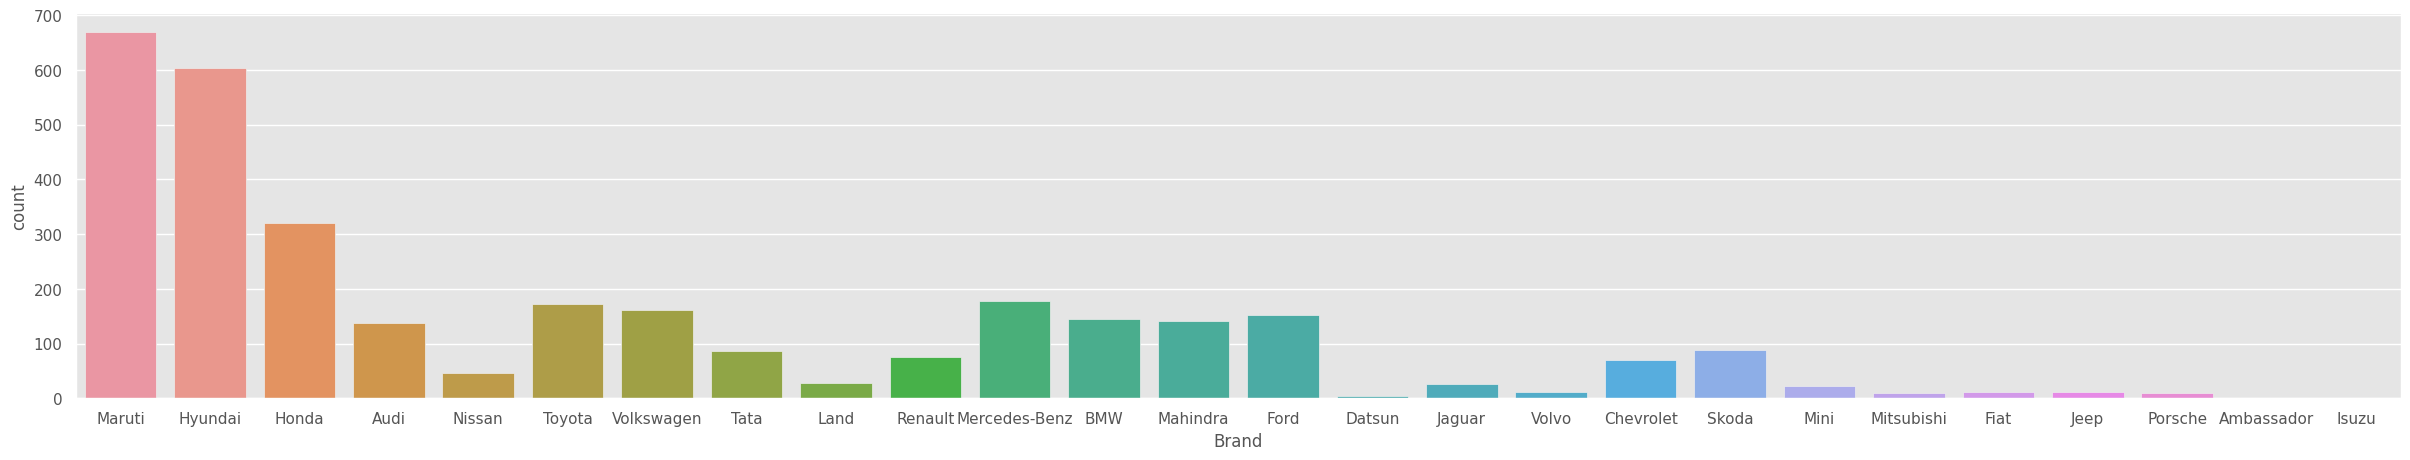

In [200]:
plt.figure(figsize = (30 ,5))
sns.countplot(data = data, x = 'Brand')
plt.show()

In [201]:
data['Seats'].value_counts().sort_values(ascending = False)

5     2714
7      337
4       55
8       51
6       13
2        9
10       3
9        2
Name: Seats, dtype: int64

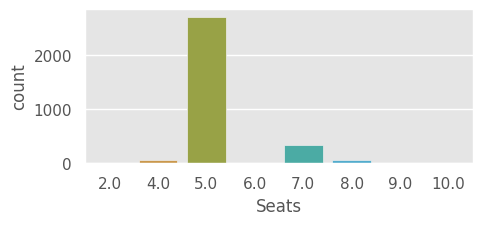

In [202]:
plt.figure(figsize = (5,2))
sns.countplot(data = data, x = 'Seats')
plt.show()

Univariate analysis results

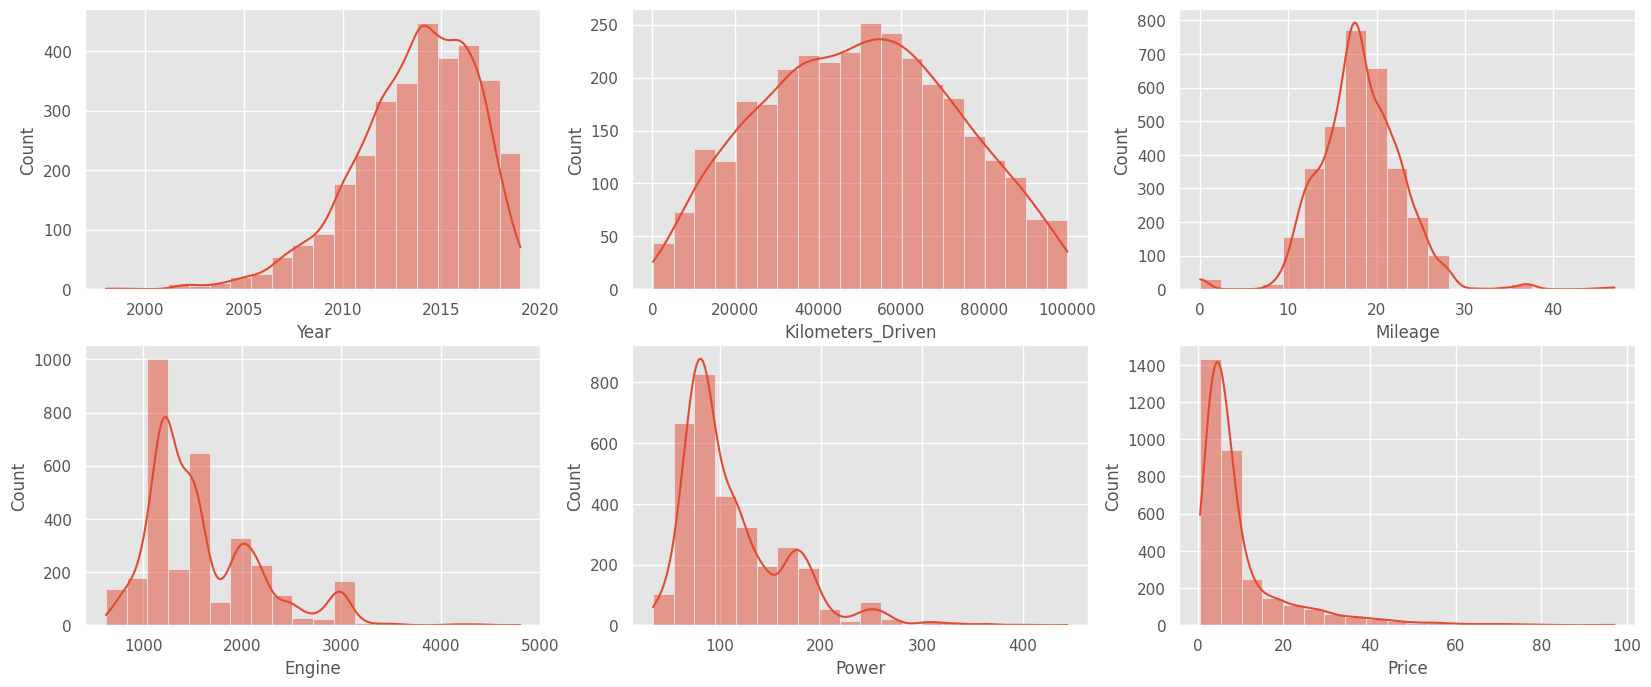

In [203]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
sns.histplot(data = data, x = data['Year'], bins = 20, kde = True, ax = ax[0, 0])
sns.histplot(data = data, x = data['Kilometers_Driven'], bins = 20, kde = True, ax = ax[0, 1])
sns.histplot(data = data, x = data['Mileage'], bins = 20, kde = True, ax = ax[0, 2])
sns.histplot(data = data, x = data['Engine'], bins = 20, kde = True, ax = ax[1, 0])
sns.histplot(data = data, x = data['Power'], bins = 20, kde = True, ax = ax[1, 1])
sns.histplot(data = data, x = data['Price'], bins = 20, kde = True, ax = ax[1, 2])
plt.show()

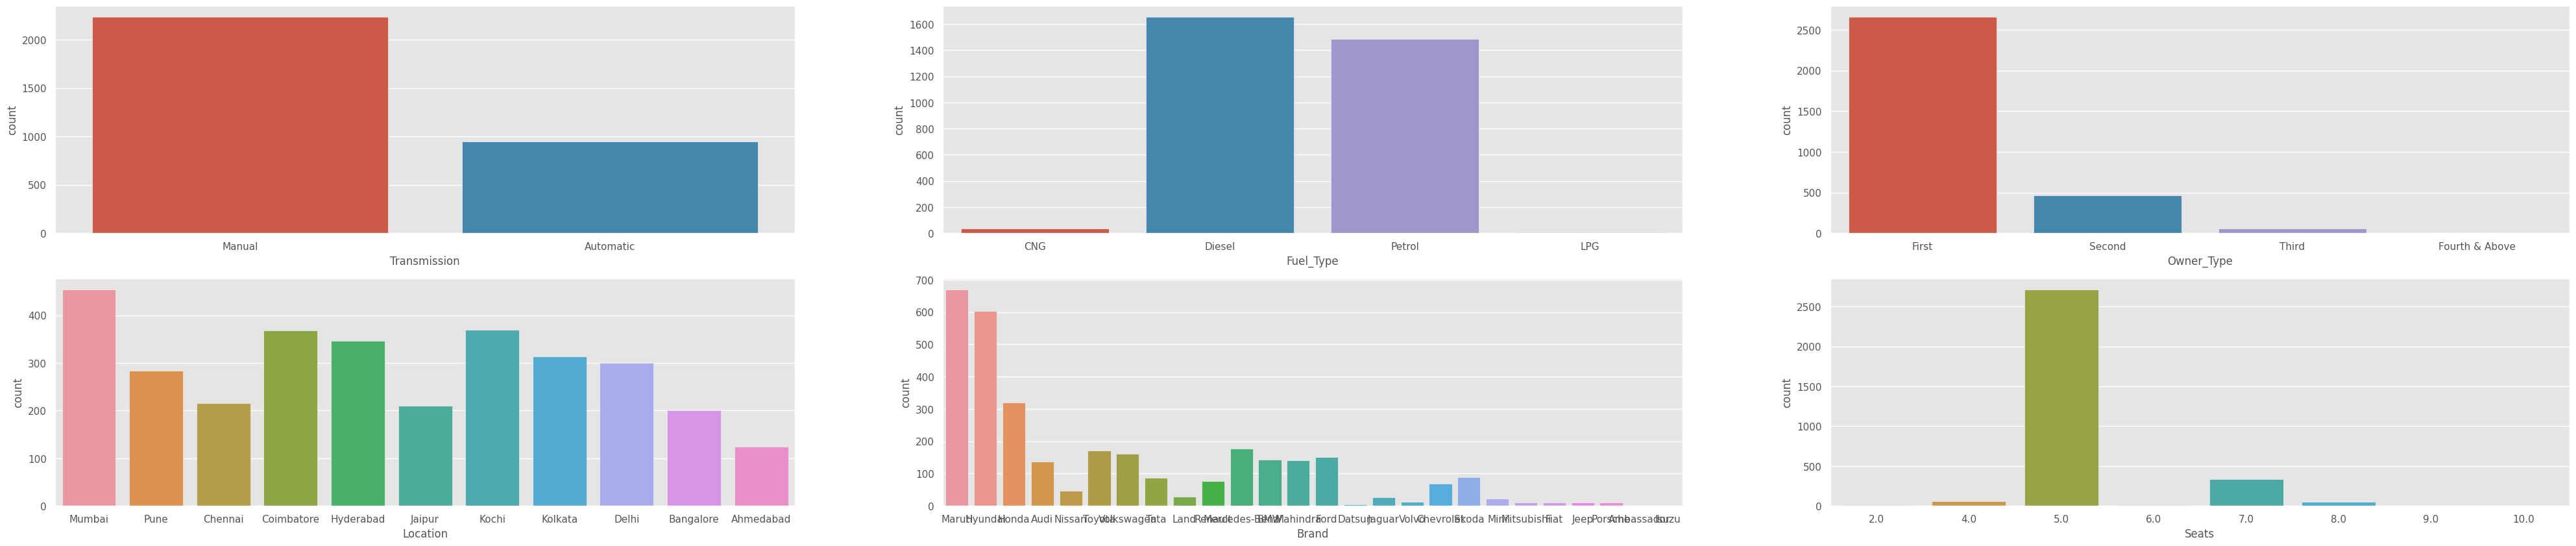

In [204]:
fig, ax = plt.subplots(2, 3, figsize = (50,10))
sns.countplot(data = data, x = 'Transmission', ax = ax[0, 0])
sns.countplot(data = data, x = 'Fuel_Type', ax = ax[0, 1])
sns.countplot(data = data, x = 'Owner_Type', ax = ax[0, 2])
sns.countplot(data = data, x = 'Location', ax = ax[1, 0])
sns.countplot(data = data, x = 'Brand', ax = ax[1, 1])
sns.countplot(data = data, x = 'Seats', ax = ax[1, 2])
plt.show()

Bivariate Analysis

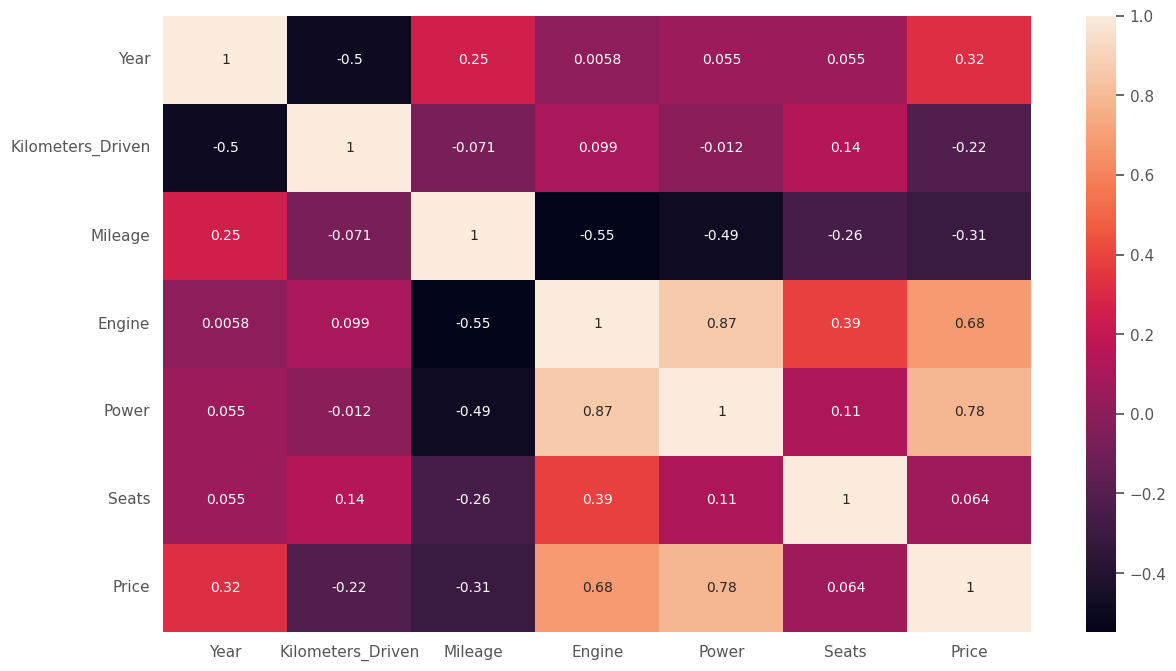

In [205]:
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

Bivariate analysis conclusions

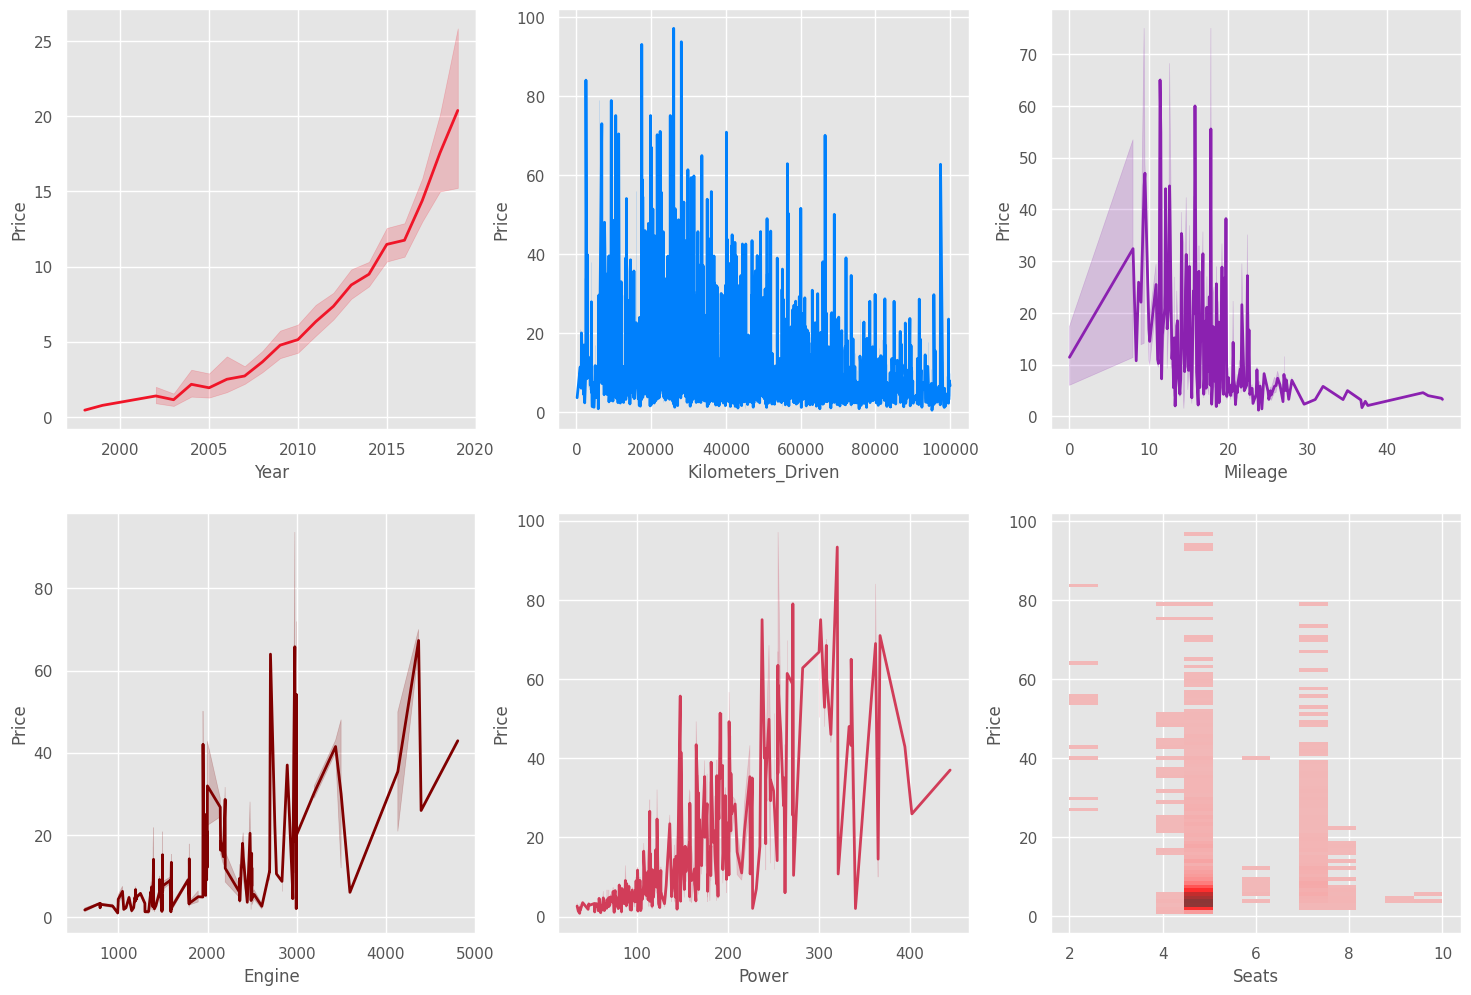

In [206]:
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
sns.lineplot(data = data, x = 'Year', y = 'Price', linewidth = 2, color = '#f01528', ax = ax[0, 0])
sns.lineplot(data = data, x = 'Kilometers_Driven', y = 'Price', linewidth = 2, color = '#0080fc', ax = ax[0, 1])
sns.lineplot(data = data, x = 'Mileage', y = 'Price', linewidth = 2, color = '#8b21b0', ax = ax[0, 2])
sns.lineplot(data = data, x = 'Engine', y = 'Price', linewidth = 2, color = '#800000', ax = ax[1, 0])
sns.lineplot(data = data, x = 'Power', y = 'Price', linewidth = 2, color = '#d13d59', ax = ax[1, 1])
sns.histplot(data = data, x = 'Seats', y = 'Price', color = '#1a0000', ax = ax[1, 2])
plt.show()

multivariate analysis

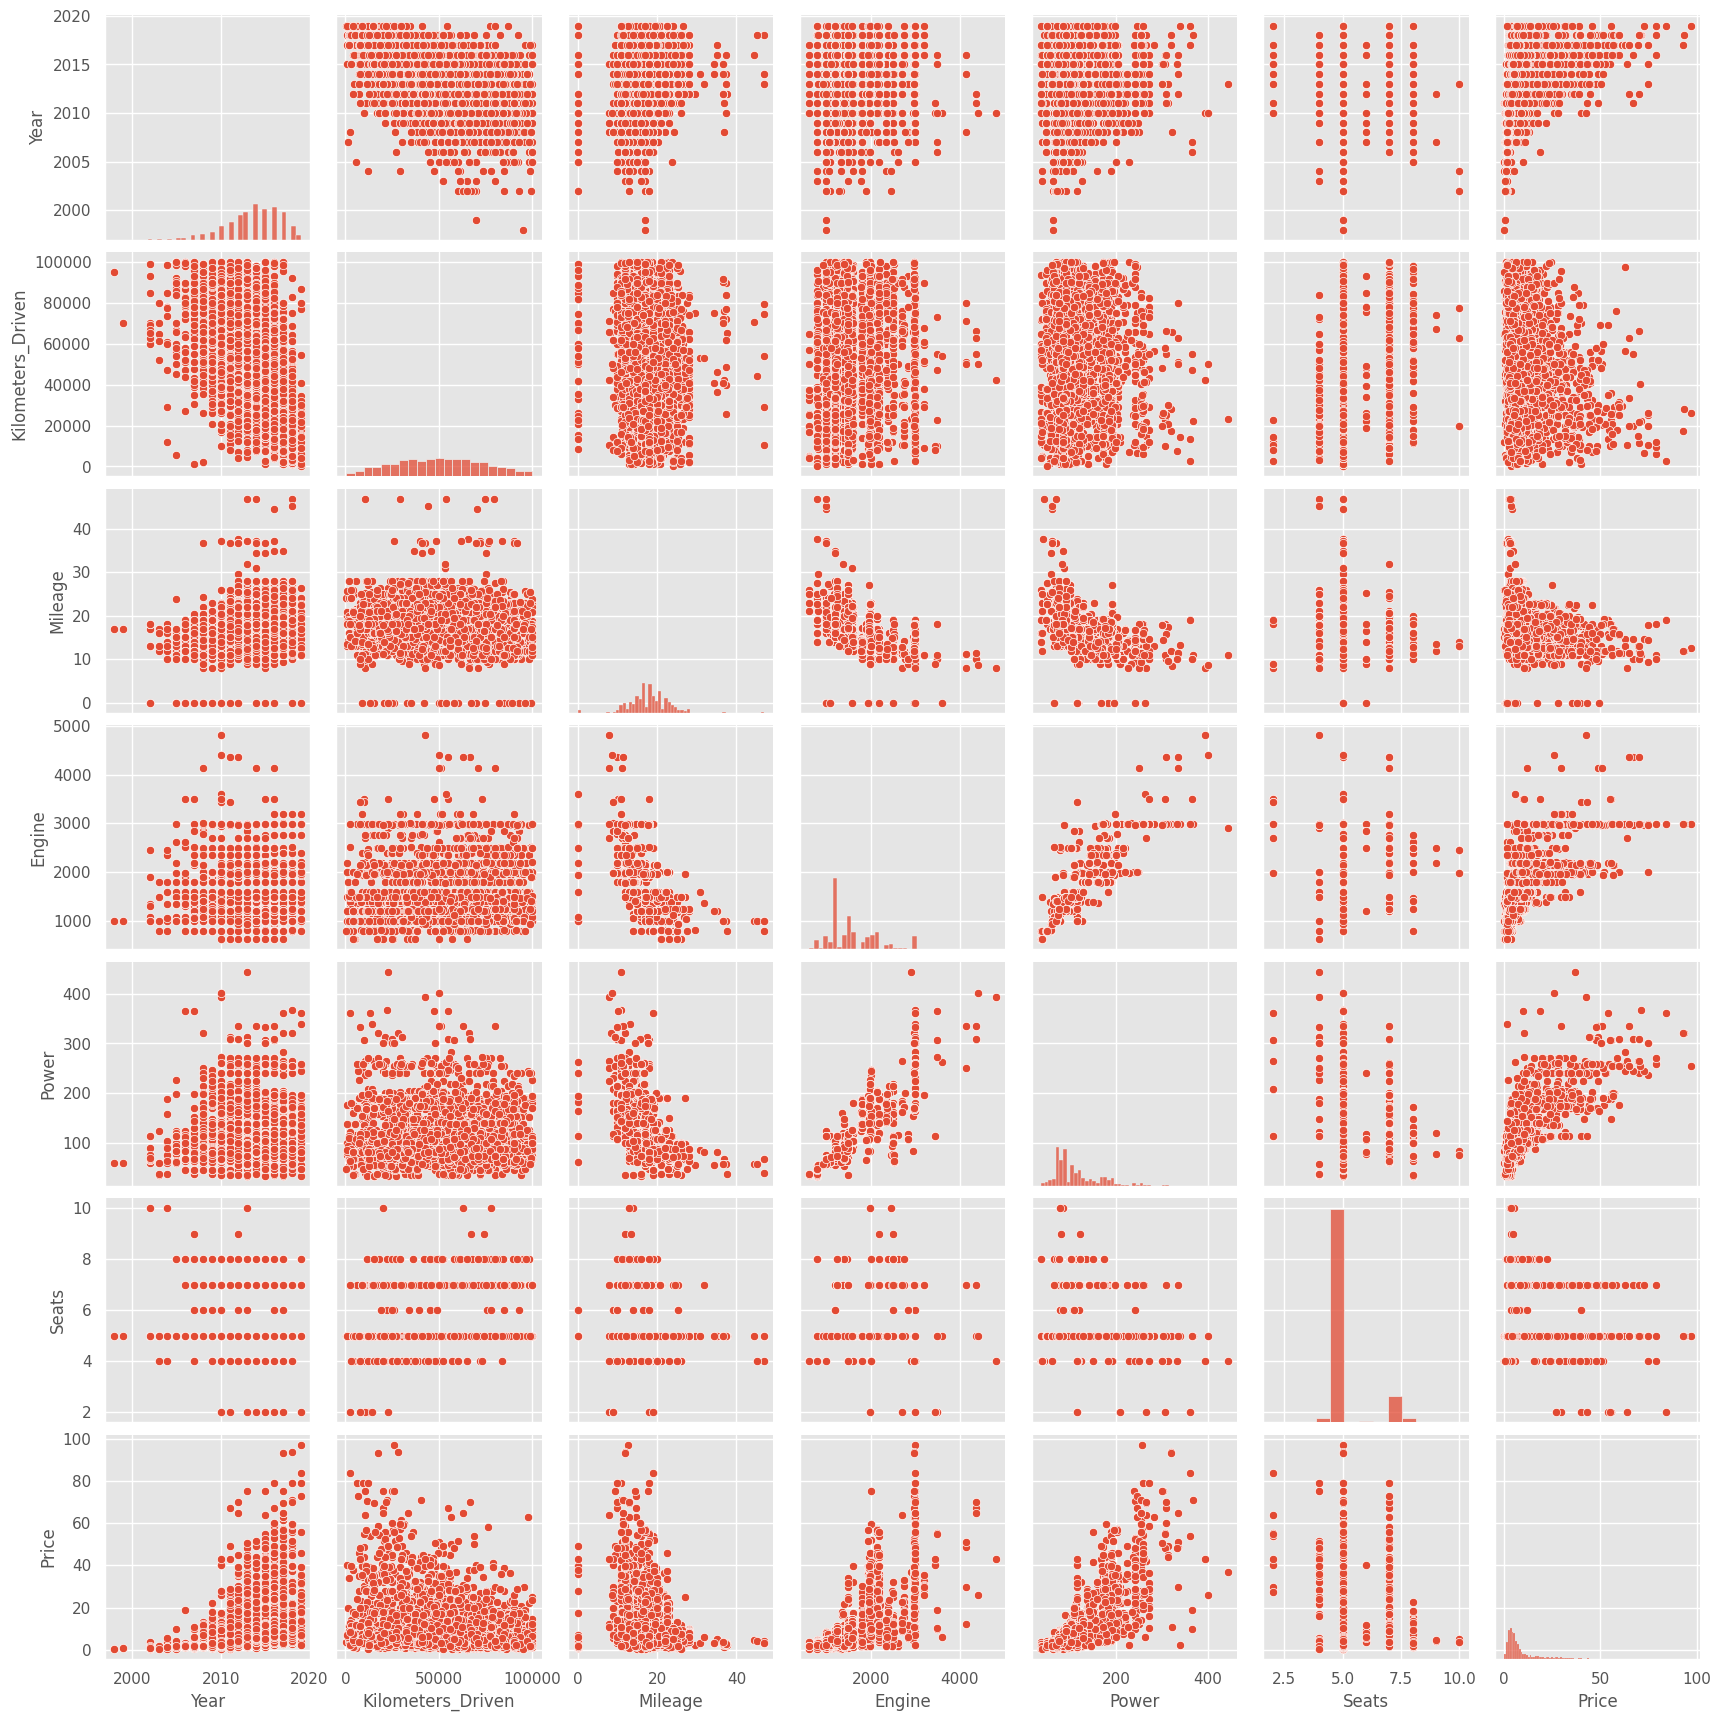

In [207]:
sns.pairplot(data)

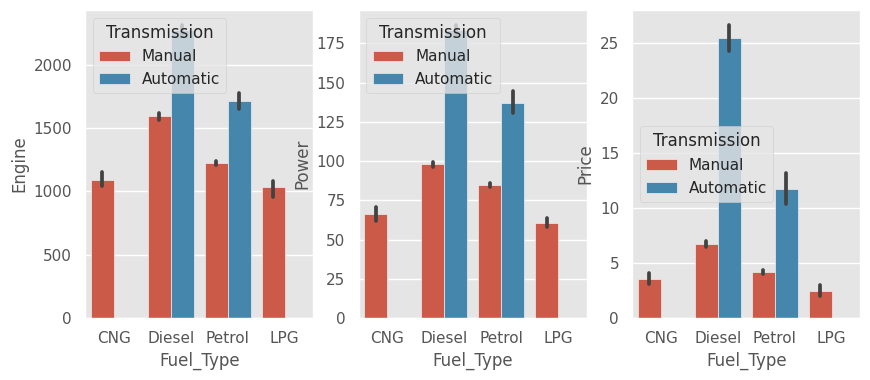

In [209]:
fig, ax = plt.subplots(1, 3, figsize = (10,4))
sns.barplot(data = data, x = 'Fuel_Type', y = 'Engine', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Fuel_Type', y = 'Power', hue = 'Transmission', ax = ax[1])
sns.barplot(data = data, x = 'Fuel_Type', y = 'Price', hue = 'Transmission', ax = ax[2])
plt.show()

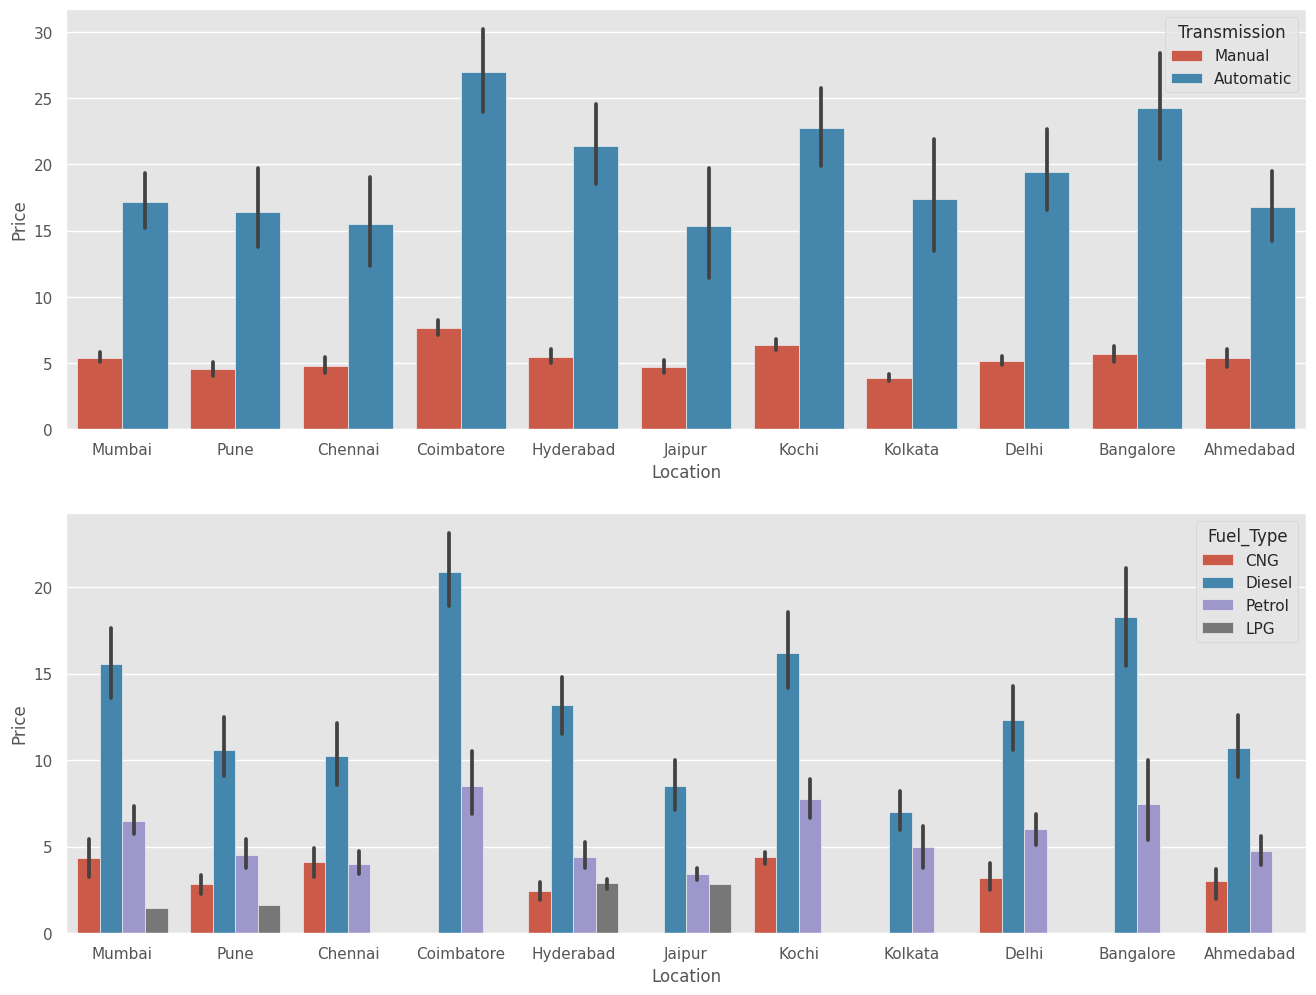

In [210]:
fig, ax = plt.subplots(2, 1, figsize = (16, 12))
sns.barplot(data = data, x = 'Location', y = 'Price', hue = 'Transmission', ax = ax[0])
sns.barplot(data = data, x = 'Location', y = 'Price', hue = 'Fuel_Type', ax = ax[1])
plt.show()

PREPROCESSING

In [211]:
# Splitting the data to Numerical Features and Categorical Features
num_features = list(data.select_dtypes('number'))
num_features.remove('Price')

nom_features = list(data.select_dtypes('object'))
nom_features.remove('Owner_Type')

ord_features = ['Owner_Type']

print(f'The Numerical Features: {num_features}')
print(f'The Nominal Features: {nom_features}')
print(f'The Ordinal Features: {ord_features}')

The Numerical Features: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
The Nominal Features: ['Location', 'Fuel_Type', 'Transmission', 'Brand']
The Ordinal Features: ['Owner_Type']


In [212]:
# taking a copy from data
data_modeling = data.copy()

X = data_modeling.drop('Price', axis = 1)
y = data_modeling['Price'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size  = 0.2, random_state = 42)

In [213]:
X_train[X_train['Brand'] == 'Isuzu']

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats
2900,Jaipur,Diesel,Automatic,First,Isuzu,2017,34429,13,"2,999",175,7


In [214]:
X_test[X_test['Brand'] == 'Isuzu']

,Location,Fuel_Type,Transmission,Owner_Type,Brand,Year,Kilometers_Driven,Mileage,Engine,Power,Seats


In [215]:
X_train = X_train.drop(2900)
y_train = y_train.drop(2900)

In [216]:
# numerical pipeline
num_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'median'),
                             StandardScaler()
                            )
# nominal pipeline
nom_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'most_frequent'),
                             OneHotEncoder()
                            )

# ordinal pipeline
ord_pipeline = make_pipeline(
                             SimpleImputer(strategy = 'most_frequent'),
                             OrdinalEncoder()
                            )
# Combine the numerical pipeline, nominal pipeline, and ordinal pipeline in a one Pipeline 
preprocessor = ColumnTransformer([
                                  ('numerical', num_pipeline, num_features), 
                                  ('nominal', nom_pipeline, nom_features),
                                  ('ordinal', ord_pipeline, ord_features)
                                ])
# Fitting the training data               
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Year', 'Kilometers_Driven', 'Mileage',
                                  'Engine', 'Power', 'Seats']),
                                ('nominal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Location', 'Fuel_Type', 'Transmission',
                                  'Brand']),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Owner_Type'])])

In [217]:
# Transform the training data
X_train_transformed = preprocessor.transform(X_train)

# Transform the testing data
X_test_transformed = preprocessor.transform(X_test)

In [218]:
# Linear Regression Model
lin_reg = LinearRegression()

# Model Fitting
lin_reg.fit(X_train_transformed, y_train)

LinearRegression()

In [219]:
# Training the Linear Regression Model 

# Predictions of X_train
lr_pred_train = lin_reg.predict(X_train_transformed)

print("Training Accuracy of Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lr_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lr_pred_train))}')
print(f'R-Squered Training       :  {round(r2_score(y_train, lr_pred_train) * 100, 2)} %')

Training Accuracy of Linear Regression: 

Mean Absolute Error      :  3.0450802956720504
Root Mean Squared  Error :  5.323711858550411
R-Squered Training       :  79.32 %


In [220]:
# Cross Validation for Linear Regression Model
lin_reg_scores = cross_val_score(lin_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Linear Regression Accuracy          :  {lin_reg_scores}')
print(f'Linear Regression Standard Deviation:  {round(lin_reg_scores.std(), 2)}')
print(f'Linear Regression Accuracy Mean     :  {round(lin_reg_scores.mean() * 100, 2)} %')

Linear Regression Accuracy          :  [0.79443701 0.7438093  0.81604146 0.78815619 0.7252104  0.83118959
 0.79965689 0.72727713]
Linear Regression Standard Deviation:  0.04
Linear Regression Accuracy Mean     :  77.82 %


In [221]:
#Testing the Linear Regression Model 

# Predictions of X_test
lr_pred_test = lin_reg.predict(X_test_transformed)

print("Tasting Accuracy for Linear Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lr_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lr_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lr_pred_test) * 100, 2)} %')

Tasting Accuracy for Linear Regression: 

Mean Absolute Error      :  2.794039752933321
Root Mean Squared  Error :  4.616456882610593
R-Squered Testing        :  81.63 %


In [222]:
# Linear Regression Model with Polynomial Features
poly_reg = Pipeline([
    
                      ('poly_features', PolynomialFeatures(degree = 2)),
                      ('lin_reg', LinearRegression())
    
                    ])

# Model Fitting
poly_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [223]:
# Training the Polynomial Regression Model 

# Predictions of X_train
poly_pred_train = poly_reg.predict(X_train_transformed)

print("Training Accuracy for Polynomial Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, poly_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, poly_pred_train))}')
print(f'R-Squered Training       :  {round(r2_score(y_train, poly_pred_train) * 100, 2)} %')

Training Accuracy for Polynomial Regression: 

Mean Absolute Error      :  1.267759089575665
Root Mean Squared  Error :  2.148225515375472
R-Squered Training       :  96.63 %


In [224]:
# Cross Validation for Polynomial Regression Model
poly_reg_scores = cross_val_score(poly_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Polynomial Regression Accuracy          :  {poly_reg_scores}')
print(f'Polynomial Regression Standard Deviation:  {round(poly_reg_scores.std(), 2)}')
print(f'Polynomial Regression Accuracy Mean     :  {round(poly_reg_scores.mean() * 100, 2)} %')

Polynomial Regression Accuracy          :  [0.85846911 0.59592366 0.71288858 0.77139502 0.79723264 0.91250631
 0.83961798 0.41456757]
Polynomial Regression Standard Deviation:  0.15
Polynomial Regression Accuracy Mean     :  73.78 %


In [228]:
#Testing the Polynomial Regression Model 

# Predictions of X_test
poly_pred_test = poly_reg.predict(X_test_transformed)

print("Tasting Accuracy for Polynomial Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, poly_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, poly_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, poly_pred_test) * 100, 2)} %')

Tasting Accuracy for Polynomial Regression: 

Mean Absolute Error      :  2.5531931210999055
Root Mean Squared  Error :  8.927128779142466
R-Squered Testing        :  31.31 %


In [229]:
# Ridge Regression Model with Polynomial Features
ridge_reg = Pipeline([
    
                            ('poly_features', PolynomialFeatures(degree = 2)),
                            ('ridge', Ridge(alpha = 0.5))
                        ])

# Model Fitting
ridge_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.5))])

In [230]:
# Training the Ridge Regression Model 

# Predictions of X_train
ridge_pred_train = ridge_reg.predict(X_train_transformed)

print("Training Accuracy for Ridge Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, ridge_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, ridge_pred_train))}')
print(f'R-Squered Training          :  {round(r2_score(y_train, ridge_pred_train) * 100, 2)} %')

Training Accuracy for Ridge Regression: 

Mean Absolute Error      :  1.313668227784167
Root Mean Squared  Error :  2.245317365711827
R-Squered Training          :  96.32 %


In [231]:
ridge_reg_scores = cross_val_score(ridge_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Ridge Regression Accuracy          :  {ridge_reg_scores}')
print(f'Ridge Regression Standard Deviation:  {round(ridge_reg_scores.std(), 2)}')
print(f'Ridge Regression Accuracy Mean     :  {round(ridge_reg_scores.mean() * 100, 2)} %')

Ridge Regression Accuracy          :  [0.88760661 0.70661465 0.89790342 0.90246227 0.85960537 0.93898877
 0.93482317 0.92512365]
Ridge Regression Standard Deviation:  0.07
Ridge Regression Accuracy Mean     :  88.16 %


In [232]:
#Testing the Ridge Regression Model 

# Predictions of X_test
ridge_pred_test = ridge_reg.predict(X_test_transformed)

print("Tasting Accuracy for Ridge Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, ridge_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, ridge_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, ridge_pred_test) * 100, 2)} %')

Tasting Accuracy for Ridge Regression: 

Mean Absolute Error      :  1.8316131780676923
Root Mean Squared  Error :  3.3047252094551114
R-Squered Testing        :  90.59 %


In [233]:
# RidgeCV Regression Model with Polynomial Features
ridgecv_reg = Pipeline([
    
                              ('poly_features', PolynomialFeatures(degree = 2)),
                              ('ridgecv', RidgeCV(alphas=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]))
    
                            ])

# Model Fitting
ridgecv_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('ridgecv',
                 RidgeCV(alphas=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]))])

In [234]:
# Training the RidgeCV Regression Model

# Predictions of X_train
ridgecv_pred_train = ridgecv_reg.predict(X_train_transformed)

print("Training Accuracy for RidgeCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, ridgecv_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, ridgecv_pred_train))}')
print(f'R-Squered Training          :  {round(r2_score(y_train, ridgecv_pred_train) * 100, 2)} %')

Training Accuracy for RidgeCV Regression: 

Mean Absolute Error      :  1.3788055175389113
Root Mean Squared  Error :  2.449745164437484
R-Squered Training          :  95.62 %


In [235]:
# Cross Validation for RidgeCV Regression Model
ridgecv_reg_scores = cross_val_score(ridgecv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'RidgeCV Regression Accuracy          :  {ridgecv_reg_scores}')
print(f'RidgeCV Regression Standard Deviation:  {round(ridgecv_reg_scores.std(), 2)}')
print(f'RidgeCV Regression Accuracy Mean     :  {round(ridgecv_reg_scores.mean() * 100, 2)} %')

RidgeCV Regression Accuracy          :  [0.90129559 0.74202451 0.91221933 0.92566606 0.89274504 0.94653884
 0.93866269 0.91981459]
RidgeCV Regression Standard Deviation:  0.06
RidgeCV Regression Accuracy Mean     :  89.74 %


In [236]:
#Testing the RidgeCV Regression Model

# Predictions of X_test
ridgecv_pred_test = ridgecv_reg.predict(X_test_transformed)

print("Tasting Accuracy for RidgeCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, ridgecv_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, ridgecv_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, ridgecv_pred_test) * 100, 2)} %')

Tasting Accuracy for RidgeCV Regression: 

Mean Absolute Error      :  1.7078394732036317
Root Mean Squared  Error :  3.078531822382307
R-Squered Testing        :  91.83 %


In [237]:
# Lasso Regression Model with Polynomial Features
lasso_reg = Pipeline([
    
                            ('poly_features', PolynomialFeatures(degree = 2)),
                            ('lasso', Lasso(alpha = 0.5))
    
                        ])

# Model Fitting
lasso_reg.fit(X_train_transformed, y_train)
Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.5))])

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lasso', Lasso(alpha=0.5))])

In [238]:
# Training the Lasso Regression Model

# Predictions of X_train
lasso_pred_train = lasso_reg.predict(X_train_transformed)

print("Training Accuracy for Lasso Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lasso_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lasso_pred_train))}')
print(f'R Squared Error          :  {round(r2_score(y_train, lasso_pred_train) * 100, 2)} %')

Training Accuracy for Lasso Regression: 

Mean Absolute Error      :  2.7043977015861693
Root Mean Squared  Error :  4.826311020761749
R Squared Error          :  83.0 %


In [239]:
# Cross Validation for Lasso Regression Model
lasso_reg_scores = cross_val_score(ridgecv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'Lasso Regression Accuracy          :  {lasso_reg_scores}')
print(f'Lasso Regression Standard Deviation:  {round(lasso_reg_scores.std(), 2)}')
print(f'Lasso Regression Accuracy Mean     :  {round(lasso_reg_scores.mean() * 100, 2)} %')

Lasso Regression Accuracy          :  [0.90129559 0.74202451 0.91221933 0.92566606 0.89274504 0.94653884
 0.93866269 0.91981459]
Lasso Regression Standard Deviation:  0.06
Lasso Regression Accuracy Mean     :  89.74 %


In [241]:
#Testing the Lasso Regression Model

# Predictions of X_test
lasso_pred_test = lasso_reg.predict(X_test_transformed)

print("Tasting Accuracy for Lasso Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lasso_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lasso_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lasso_pred_test) * 100, 2)} %')

Tasting Accuracy for Lasso Regression: 

Mean Absolute Error      :  2.5585556936945735
Root Mean Squared  Error :  4.2669011647209905
R-Squered Testing        :  84.31 %


In [240]:
# LassoCV Regression Model with Polynomial Features
lassocv_reg = Pipeline([
    
                            ('poly_features', PolynomialFeatures(degree = 2)),
                            ('lassocv', LassoCV(alphas=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]))
                          
                            ])

# Model Fitting
lassocv_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('lassocv',
                 LassoCV(alphas=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]))])

In [242]:
# Training the LassoCV Regression Model

# Predictions of X_train
lassocv_pred_train = lassocv_reg.predict(X_train_transformed)

print("Training Accuracy for LassoCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, lassocv_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, lassocv_pred_train))}')
print(f'R-Squered Train          :  {round(r2_score(y_train, lassocv_pred_train) * 100, 2)} %')

Training Accuracy for LassoCV Regression: 

Mean Absolute Error      :  2.1944401147714023
Root Mean Squared  Error :  4.035267553865695
R-Squered Train          :  88.12 %


In [243]:
# Cross Validation for LassoCV Regression Model
lassocv_reg_scores = cross_val_score(lassocv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'LassoCV Regression Accuracy          :  {lassocv_reg_scores}')
print(f'LassoCV Regression Standard Deviation:  {round(lassocv_reg_scores.std(), 2)}')
print(f'LassoCV Regression Accuracy Mean     :  {round(lassocv_reg_scores.mean() * 100, 2)} %')

LassoCV Regression Accuracy          :  [0.85263695 0.77049552 0.88179547 0.87966663 0.85250332 0.90421504
 0.89066447 0.86987942]
LassoCV Regression Standard Deviation:  0.04
LassoCV Regression Accuracy Mean     :  86.27 %


In [244]:
#Testing the LassoCV Regression Model

# Predictions of X_test
lassocv_pred_test = lassocv_reg.predict(X_test_transformed)

print("Tasting Accuracy for LassoCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, lassocv_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, lassocv_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, lassocv_pred_test) * 100, 2)} %')

Tasting Accuracy for LassoCV Regression: 

Mean Absolute Error      :  2.1582851856464256
Root Mean Squared  Error :  3.728552502813191
R-Squered Testing        :  88.02 %


In [245]:
# ElasticNet Regression Model with Polynomial Features
elasticnet_reg = Pipeline([
    
                                ('poly_features', PolynomialFeatures(degree = 2)),
                                ('elasticnt', ElasticNet(alpha = 0.5))
    
                              ])

# Model Fitting
elasticnet_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('elasticnt', ElasticNet(alpha=0.5))])

In [246]:
# Training the ElasticNet Regression Model

# Predictions of X_train
elasticnet_pred_train = elasticnet_reg.predict(X_train_transformed)

print("Training Accuracy for ElasticNet Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, elasticnet_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, elasticnet_pred_train))}')
print(f'R-Squered Train          :  {round(r2_score(y_train, elasticnet_pred_train) * 100, 2)} %')

Training Accuracy for ElasticNet Regression: 

Mean Absolute Error      :  2.520368477110057
Root Mean Squared  Error :  4.701764805516017
R-Squered Train          :  83.87 %


In [247]:
# Cross Validation for ElasticNet Regression Model
elasticnet_reg_scores = cross_val_score(elasticnet_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'ElasticNet Regression Accuracy          :  {elasticnet_reg_scores}')
print(f'ElasticNet Regression Standard Deviation:  {round(elasticnet_reg_scores.std(), 2)}')
print(f'ElasticNet Regression Accuracy Mean     :  {round(elasticnet_reg_scores.mean() * 100, 2)} %')

ElasticNet Regression Accuracy          :  [0.82689912 0.7634796  0.84759425 0.84276032 0.79778583 0.86415608
 0.85855937 0.82031921]
ElasticNet Regression Standard Deviation:  0.03
ElasticNet Regression Accuracy Mean     :  82.77 %


In [248]:
#Testing the ElasticNet Regression Model

# Predictions of X_test
elasticnet_pred_test = elasticnet_reg.predict(X_test_transformed)

print("Tasting Accuracy for LassoCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, elasticnet_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, elasticnet_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, elasticnet_pred_test) * 100, 2)} %')

Tasting Accuracy for LassoCV Regression: 

Mean Absolute Error      :  2.3798269520757778
Root Mean Squared  Error :  4.115243246307907
R-Squered Testing        :  85.4 %


In [249]:
# ElasticNetCV Regression Model with Polynomial Features
elasticnetcv_reg = Pipeline([
    
                                  ('poly_features', PolynomialFeatures(degree = 2)),
                                  ('elasticntcv', ElasticNetCV())
                               
                                ])
 
# Model Fitting
elasticnetcv_reg.fit(X_train_transformed, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures()),
                ('elasticntcv', ElasticNetCV())])

In [250]:
# Training the ElasticNetCV Regression Model

# Predictions of X_train
elasticnetcv_pred_train = elasticnetcv_reg.predict(X_train_transformed)

print("Training Accuracy for ElasticNetCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_train, elasticnetcv_pred_train)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_train, elasticnetcv_pred_train))}')
print(f'R-Squered Train          :  {round(r2_score(y_train, elasticnetcv_pred_train) * 100, 2)} %')

Training Accuracy for ElasticNetCV Regression: 

Mean Absolute Error      :  1.732824347265759
Root Mean Squared  Error :  3.279922831471518
R-Squered Train          :  92.15 %


In [251]:
# Cross Validation for ElasticNet Regression Model
elasticnetcv_reg_scores = cross_val_score(elasticnetcv_reg, X_train_transformed, y_train, scoring = 'r2', cv = 8)

print(f'ElasticNetCV Regression Accuracy          :  {elasticnetcv_reg_scores}')
print(f'ElasticNetCV Regression Standard Deviation:  {round(elasticnetcv_reg_scores.std(), 2)}')
print(f'ElasticNetCV Regression Accuracy Mean     :  {round(elasticnetcv_reg_scores.mean() * 100, 2)} %')

ElasticNetCV Regression Accuracy          :  [0.89924687 0.77760905 0.90420611 0.91755267 0.89054305 0.93185759
 0.92083499 0.89955716]
ElasticNetCV Regression Standard Deviation:  0.05
ElasticNetCV Regression Accuracy Mean     :  89.27 %


In [252]:
#Testing the ElasticNetCV Regression Model

# Predictions of X_test
elasticnetcv_pred_test = elasticnetcv_reg.predict(X_test_transformed)

print("Tasting Accuracy for ElasticNetCV Regression: \n")
print(f'Mean Absolute Error      :  {mean_absolute_error(y_test, elasticnetcv_pred_test)}')
print(f'Root Mean Squared  Error :  {np.sqrt(mean_squared_error(y_test, elasticnetcv_pred_test))}')
print(f'R-Squered Testing        :  {round(r2_score(y_test, elasticnetcv_pred_test) * 100, 2)} %')

Tasting Accuracy for ElasticNetCV Regression: 

Mean Absolute Error      :  1.8431685911333493
Root Mean Squared  Error :  3.296393997524986
R-Squered Testing        :  90.63 %


In [255]:
# Linear Regression vs. Decision Tree Training and Testing Accuracy
Models_Summarization = pd.DataFrame(
                {
                  
                    'Training Accuracy': [round(r2_score(y_train, lr_pred_train) * 100, 2), 
                                          round(r2_score(y_train, poly_pred_train) * 100, 2), 
                                          round(r2_score(y_train, ridge_pred_train) * 100, 2), 
                                          round(r2_score(y_train, ridgecv_pred_train) * 100, 2), 
                                          round(r2_score(y_train, lasso_pred_train) * 100, 2), 
                                          round(r2_score(y_train, lassocv_pred_train) * 100, 2), 
                                          round(r2_score(y_train, elasticnet_pred_train) * 100, 2),
                                          round(r2_score(y_train, elasticnetcv_pred_train) * 100, 2)], 
                 'Teasting Accuracy': [round(r2_score(y_test, lr_pred_test) * 100, 2), 
                                         round(r2_score(y_test, poly_pred_test) * 100, 2), 
                                         round(r2_score(y_test, ridge_pred_test) * 100, 2), 
                                         round(r2_score(y_test, ridgecv_pred_test) * 100, 2), 
                                         round(r2_score(y_test, lasso_pred_test) * 100, 2), 
                                         round(r2_score(y_test, lassocv_pred_test) * 100, 2), 
                                         round(r2_score(y_test, elasticnet_pred_test) * 100, 2), 
                                         round(r2_score(y_test, elasticnetcv_pred_test) * 100, 2)], 
              
                }, 
                 index = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'RidgeCV Regression', 
                         'Lasso Regression', 'LassoCV Regression', 'ElasticNet Regression', 'ElasticNetCV Regression']
            )

In [256]:
Models_Summarization

,Training Accuracy,Teasting Accuracy
Linear Regression,79,82
Polynomial Regression,97,31
Ridge Regression,96,91
RidgeCV Regression,96,92
Lasso Regression,83,84
LassoCV Regression,88,88
ElasticNet Regression,84,85
ElasticNetCV Regression,92,91


the best model is RidgeCV

In [257]:
# the library to save models
import joblib

In [258]:
# Save RidgeCV Regression Model
joblib.dump(ridgecv_reg, 'RidgeCV_Model.pkl')

['RidgeCV_Model.pkl']

In [259]:
# Save Transformation Pipeline
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']